In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Amazon Customer Behavior Survey.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [4]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [5]:
df.Product_Search_Method.value_counts()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64

In [6]:
mode_value = df['Product_Search_Method'].mode()[0]

df['Product_Search_Method'].fillna(mode_value, inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\3599787854.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Search_Method'].fillna(mode_value, inplace=True)


In [7]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [8]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


##### This cell shows that "age" column has outliers as there is a big difference between 75% and max value

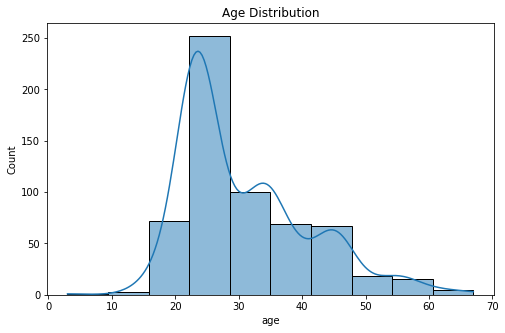

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

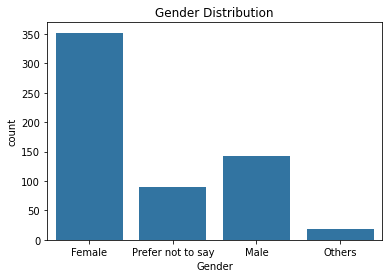

In [10]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

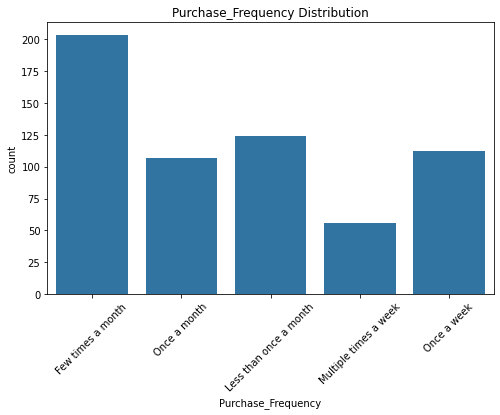

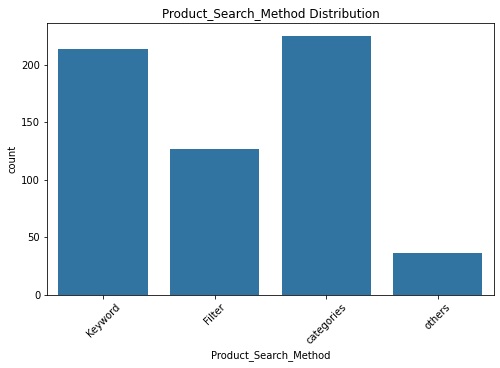

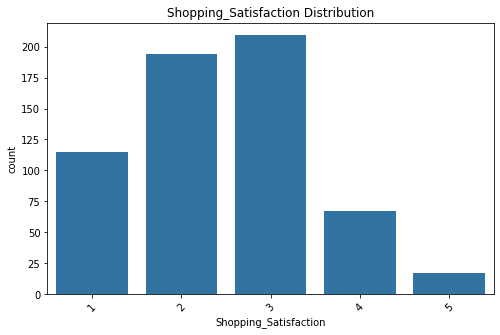

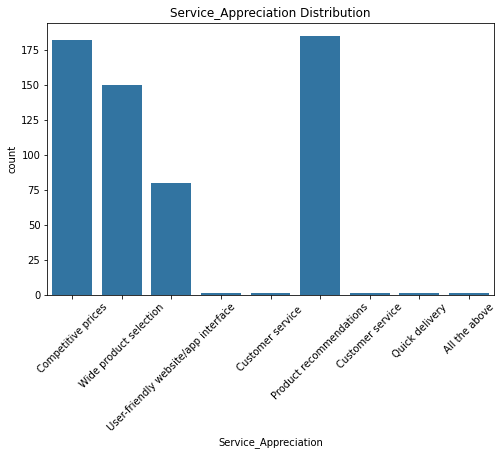

In [11]:
categorical_features = ['Purchase_Frequency', 'Product_Search_Method', 'Shopping_Satisfaction', 'Service_Appreciation']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
    plt.show()

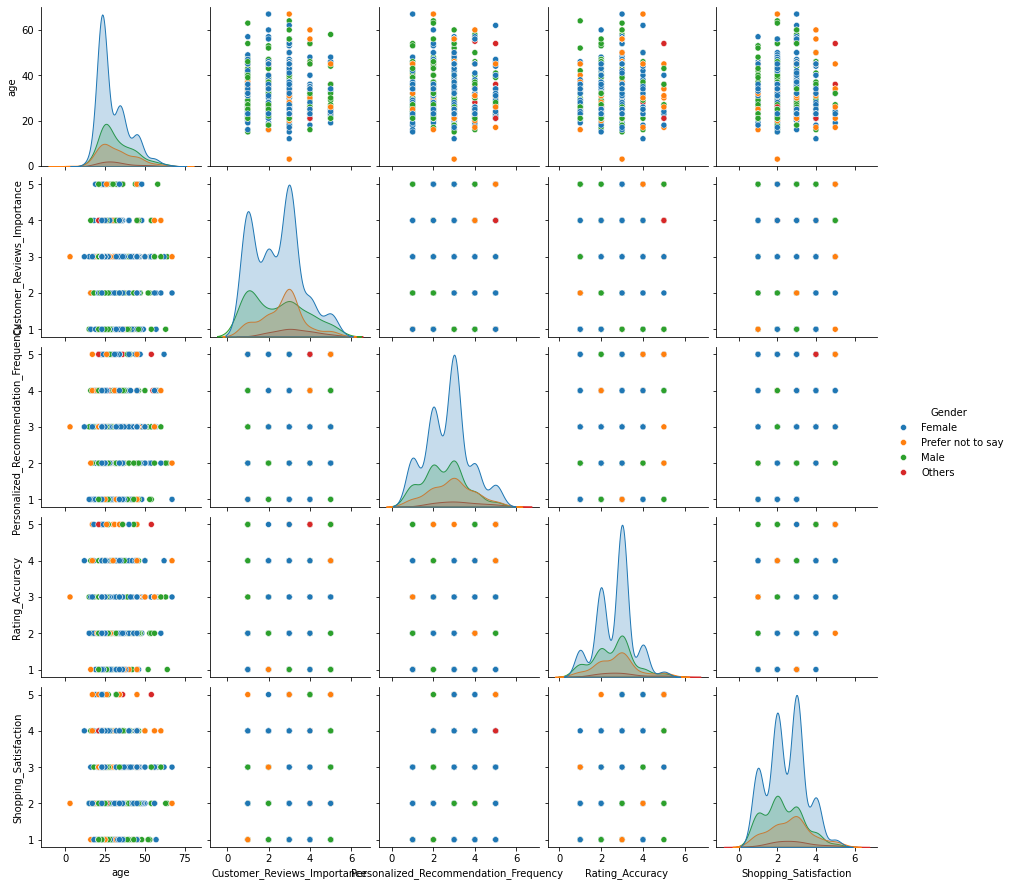

In [12]:
sns.pairplot(df, hue='Gender')
plt.show()


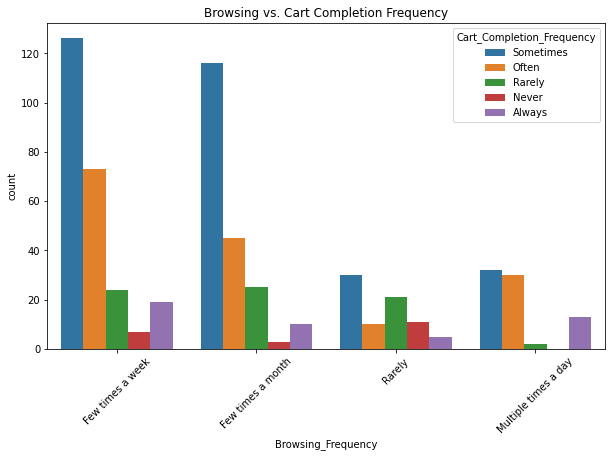

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Browsing_Frequency', hue='Cart_Completion_Frequency', data=df)
plt.title('Browsing vs. Cart Completion Frequency')
plt.xticks(rotation=45)
plt.show()


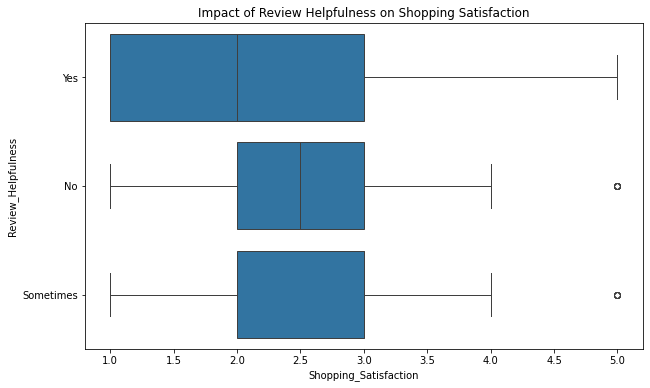

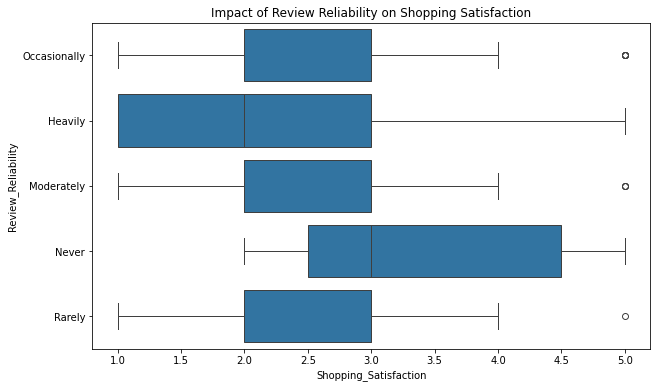

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shopping_Satisfaction', y='Review_Helpfulness', data=df)
plt.title('Impact of Review Helpfulness on Shopping Satisfaction')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Shopping_Satisfaction', y='Review_Reliability', data=df)
plt.title('Impact of Review Reliability on Shopping Satisfaction')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\1906226798.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


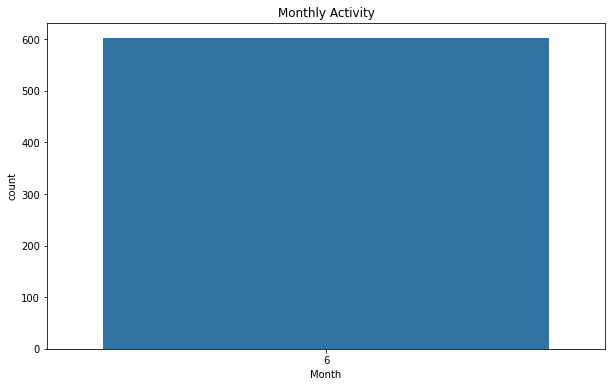

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Monthly Activity')
plt.show()


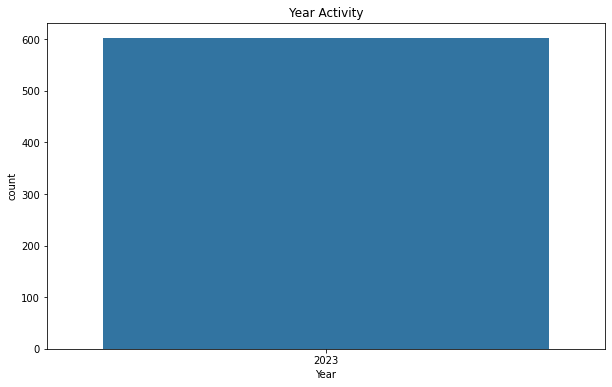

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Year Activity')
plt.show()


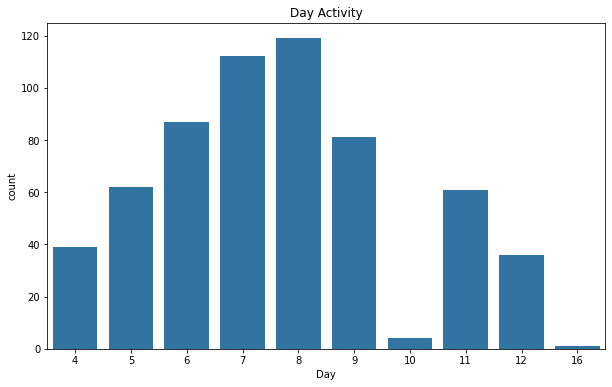

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=df)
plt.title('Day Activity')
plt.show()


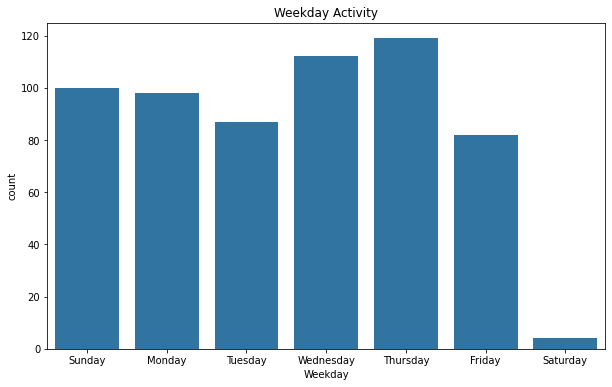

In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=df)
plt.title('Weekday Activity')
plt.show()


In [19]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

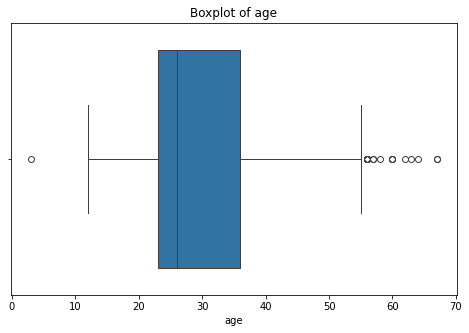

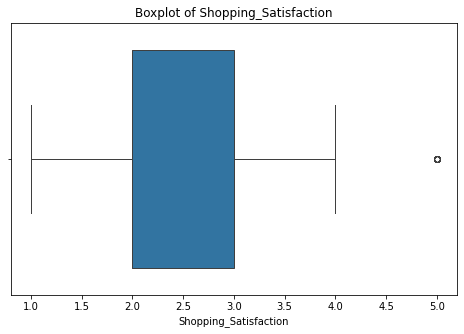

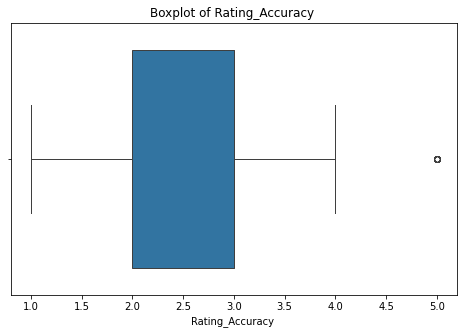

In [20]:
numerical_features = ['age', 'Shopping_Satisfaction', 'Rating_Accuracy ']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


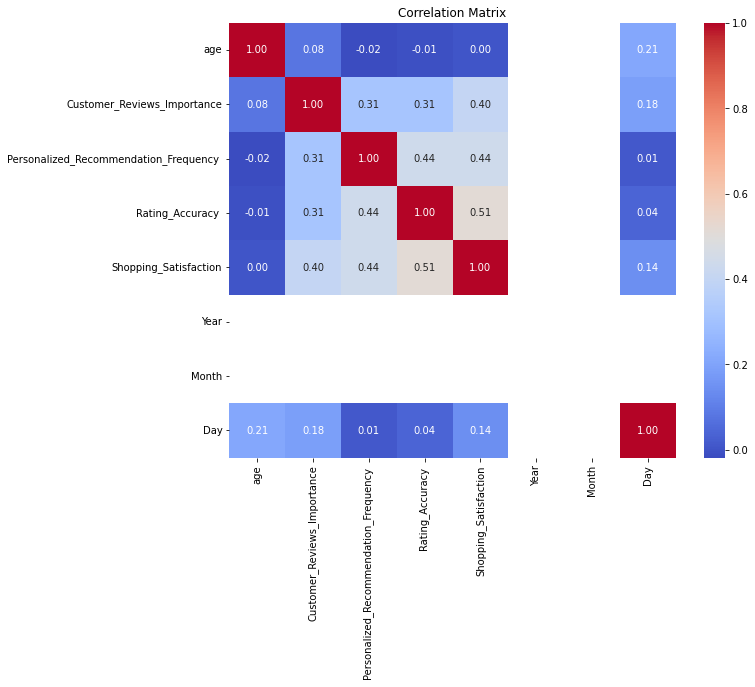

In [21]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [22]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %I:%M:%S %p %Z')

df['Time'] = df['Timestamp'].dt.time

df['Timezone'] = df['Timestamp'].dt.strftime('%Z')

print(df[['Timestamp', 'Time', 'Timezone']].head())


                  Timestamp      Time   Timezone
0 2023-06-04 13:28:19-05:30  13:28:19  UTC-05:30
1 2023-06-04 14:30:44-05:30  14:30:44  UTC-05:30
2 2023-06-04 17:04:56-05:30  17:04:56  UTC-05:30
3 2023-06-04 17:13:00-05:30  17:13:00  UTC-05:30
4 2023-06-04 17:28:06-05:30  17:28:06  UTC-05:30


In [23]:
df.Timezone.value_counts()

Timezone
UTC-05:30    602
Name: count, dtype: int64

In [24]:
df.drop(['Timestamp','Year','Month','Timezone'],axis=1,inplace=True)
df.head()

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Day,Weekday,Time
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,4,Sunday,13:28:19
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,4,Sunday,14:30:44
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,4,No,3,3,Competitive prices,Product quality and accuracy,4,Sunday,17:04:56
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,4,Sunday,17:13:00
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,4,Sunday,17:28:06


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\1649465390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


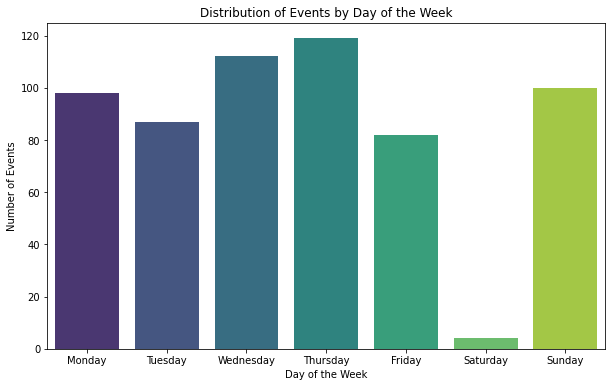

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Distribution of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.show()


In [26]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

print(df[['Time', 'Hour']].head())


       Time  Hour
0  13:28:19    13
1  14:30:44    14
2  17:04:56    17
3  17:13:00    17
4  17:28:06    17


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\2185810754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


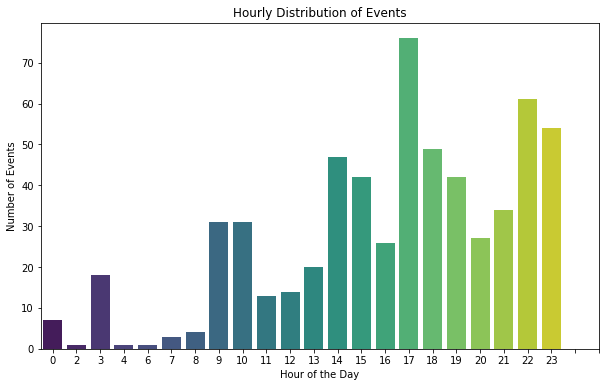

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Hourly Distribution of Events')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(range(0, 24))
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\667660270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TimeOfDay', data=df, order=labels, palette='viridis')


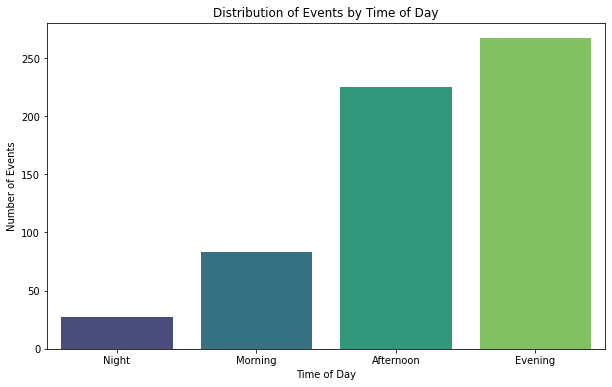

In [28]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['TimeOfDay'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='TimeOfDay', data=df, order=labels, palette='viridis')
plt.title('Distribution of Events by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Events')
plt.show()


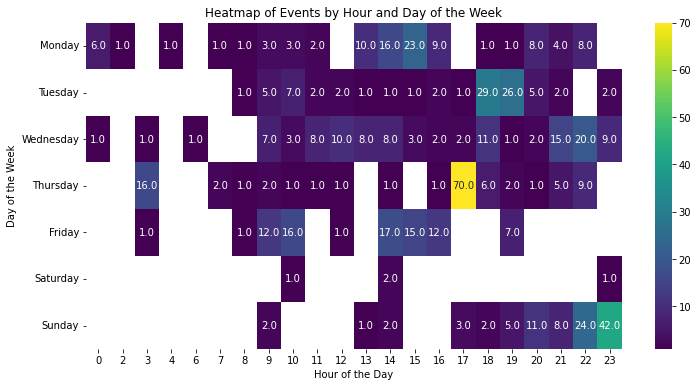

In [29]:
pivot_table = df.pivot_table(index='Weekday', columns='Hour', values='Purchase_Frequency', aggfunc='count').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.1f')
plt.title('Heatmap of Events by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


#### How does purchase frequency vary across different age groups and genders?

In [30]:
df['Purchase_Frequency'] = df['Purchase_Frequency'].astype('category').cat.codes
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_analysis = df.groupby('AgeGroup')['Purchase_Frequency'].mean().reset_index()
print(age_group_analysis)


  AgeGroup  Purchase_Frequency
0     0-18            1.384615
1    19-25            1.712389
2    26-35            1.809524
3    36-45            1.607143
4    46-55            1.328571
5    56-65            1.666667
6      66+            0.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\1266044440.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby('AgeGroup')['Purchase_Frequency'].mean().reset_index()


In [31]:
gender_analysis = df.groupby('Gender')['Purchase_Frequency'].mean().reset_index()
print(gender_analysis)

              Gender  Purchase_Frequency
0             Female            1.642045
1               Male            1.718310
2             Others            1.421053
3  Prefer not to say            1.752809


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\204667953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Purchase_Frequency', data=df, palette='viridis')


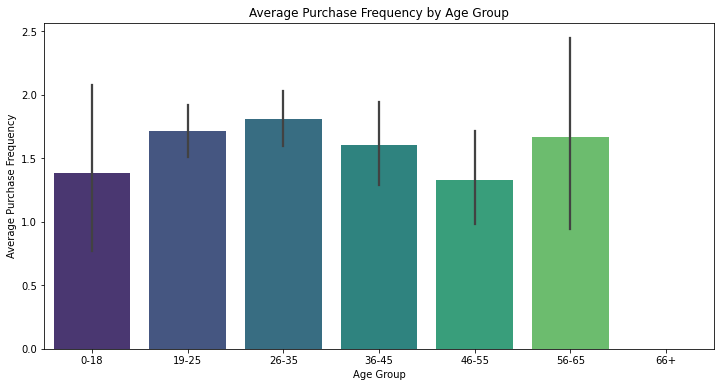

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Purchase_Frequency', data=df, palette='viridis')
plt.title('Average Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Frequency')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\318366077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase_Frequency', data=df, palette='viridis')


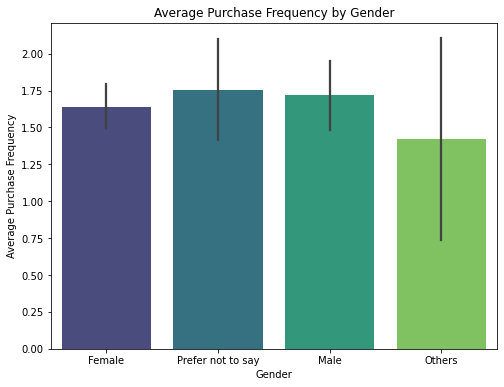

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase_Frequency', data=df, palette='viridis')
plt.title('Average Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Frequency')
plt.show()

##### - People Between 26-35 purchase more than any other age groups, Also the group 46-55 is the lower paying group.
##### - The Gender category 'Prefer not to say' purchase more than any other group, while 'others' are the lowest.

______________________

###### What product categories are most popular among different age groups and genders?

In [34]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_category_counts = df.groupby(['AgeGroup', 'Purchase_Categories']).size().unstack().fillna(0)
age_group_category_counts


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\3067004783.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_category_counts = df.groupby(['AgeGroup', 'Purchase_Categories']).size().unstack().fillna(0)


Purchase_Categories,Beauty and Personal Care,Beauty and Personal Care;Clothing and Fashion,Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Beauty and Personal Care;Clothing and Fashion;others,Beauty and Personal Care;Home and Kitchen,Beauty and Personal Care;Home and Kitchen;others,Beauty and Personal Care;others,Clothing and Fashion,Clothing and Fashion;Home and Kitchen,...,Groceries and Gourmet Food;Beauty and Personal Care;others,Groceries and Gourmet Food;Clothing and Fashion,Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen,Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others,Groceries and Gourmet Food;Clothing and Fashion;others,Groceries and Gourmet Food;Home and Kitchen,Groceries and Gourmet Food;Home and Kitchen;others,Home and Kitchen,Home and Kitchen;others,others
AgeGroup,,,,,,,,,,,,,,,,,,,,,
0-18,1,0,1,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,1,0,0
19-25,44,28,12,1,7,11,4,4,49,12,...,0,1,2,0,1,0,0,5,0,20
26-35,33,12,14,5,2,3,1,1,34,9,...,1,2,0,1,1,2,0,6,4,19
36-45,8,4,11,1,2,4,0,0,7,3,...,1,1,0,2,0,1,4,5,3,4
46-55,15,1,3,1,0,2,0,2,12,2,...,1,2,2,0,0,2,1,5,1,5
56-65,4,1,1,0,1,1,0,0,2,0,...,0,0,0,0,0,0,1,1,1,0
66+,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
gender_category_counts = df.groupby(['Gender', 'Purchase_Categories']).size().unstack().fillna(0)
gender_category_counts

Purchase_Categories,Beauty and Personal Care,Beauty and Personal Care;Clothing and Fashion,Beauty and Personal Care;Clothing and Fashion;Home and Kitchen,Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others,Beauty and Personal Care;Clothing and Fashion;others,Beauty and Personal Care;Home and Kitchen,Beauty and Personal Care;Home and Kitchen;others,Beauty and Personal Care;others,Clothing and Fashion,Clothing and Fashion;Home and Kitchen,...,Groceries and Gourmet Food;Beauty and Personal Care;others,Groceries and Gourmet Food;Clothing and Fashion,Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen,Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others,Groceries and Gourmet Food;Clothing and Fashion;others,Groceries and Gourmet Food;Home and Kitchen,Groceries and Gourmet Food;Home and Kitchen;others,Home and Kitchen,Home and Kitchen;others,others
Gender,,,,,,,,,,,,,,,,,,,,,
Female,72.0,31.0,28.0,3.0,10.0,15.0,2.0,7.0,66.0,14.0,...,0.0,2.0,0.0,2.0,2.0,2.0,2.0,17.0,4.0,18.0
Male,10.0,5.0,10.0,3.0,1.0,4.0,2.0,0.0,19.0,9.0,...,2.0,0.0,3.0,1.0,0.0,3.0,3.0,2.0,3.0,27.0
Others,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
Prefer not to say,19.0,9.0,4.0,2.0,1.0,2.0,1.0,0.0,19.0,4.0,...,1.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0


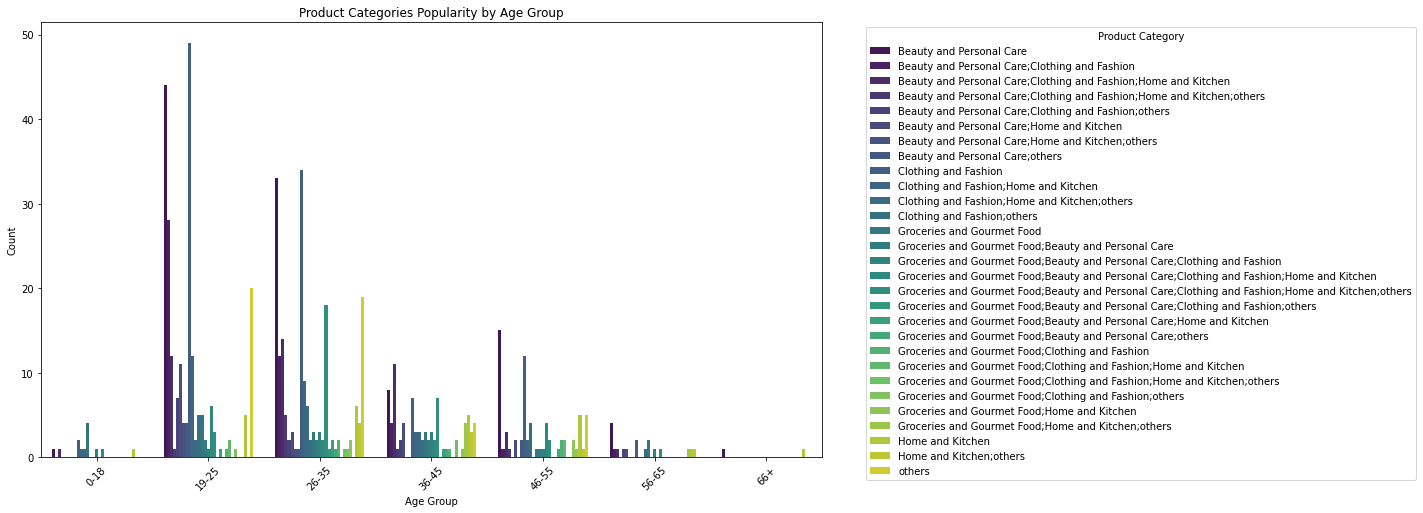

In [36]:
age_group_category_counts_melted = age_group_category_counts.reset_index().melt(id_vars='AgeGroup', var_name='Category', value_name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='AgeGroup', y='Count', hue='Category', data=age_group_category_counts_melted, palette='viridis')
plt.title('Product Categories Popularity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

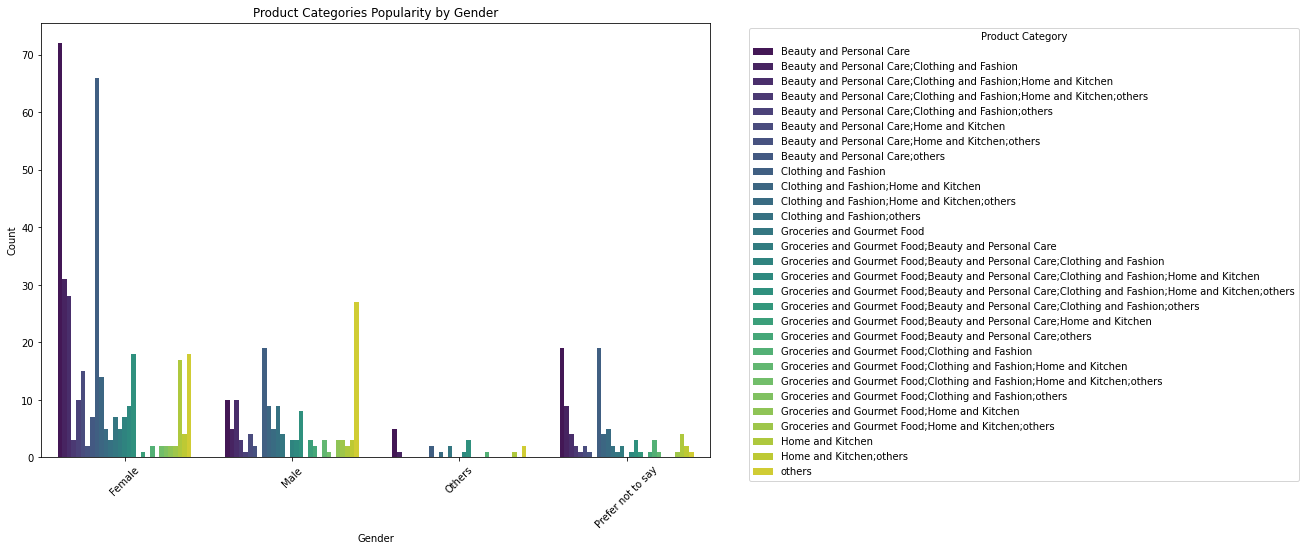

In [37]:
gender_category_counts_melted = gender_category_counts.reset_index().melt(id_vars='Gender', var_name='Category', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Count', hue='Category', data=gender_category_counts_melted, palette='viridis')
plt.title('Product Categories Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

###### Top Product Categories by Age Group


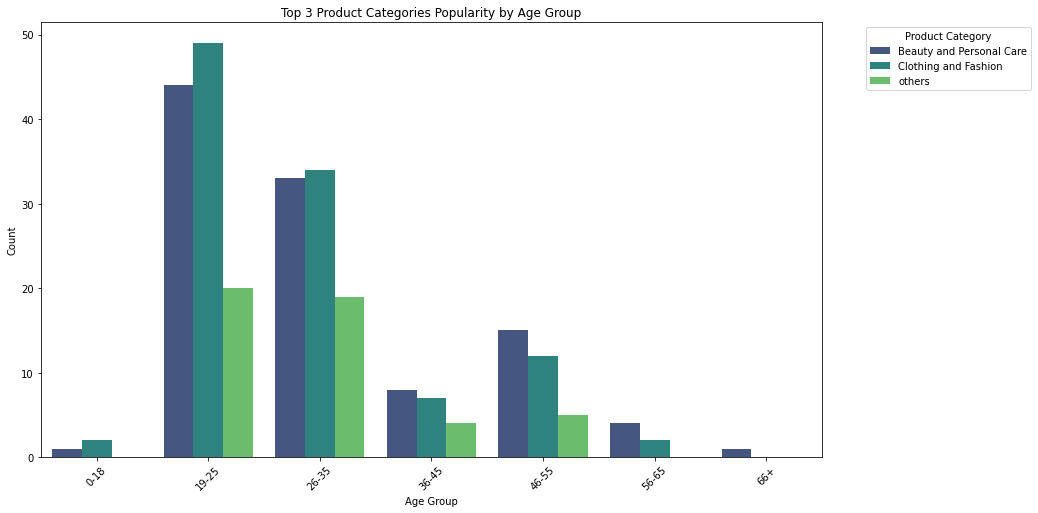

In [38]:
top_n = 3
top_categories = age_group_category_counts.sum().nlargest(top_n).index
filtered_age_group_category_counts = age_group_category_counts[top_categories]

filtered_age_group_category_counts_melted = filtered_age_group_category_counts.reset_index().melt(id_vars='AgeGroup', var_name='Category', value_name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='AgeGroup', y='Count', hue='Category', data=filtered_age_group_category_counts_melted, palette='viridis')
plt.title(f'Top {top_n} Product Categories Popularity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


for 0-18, 19-25 and 26-35 they prefer to buy clothing and fashion products, while the rest of other groups prefer to buy beauty and personal care products

###### Top Product Categories by Gender


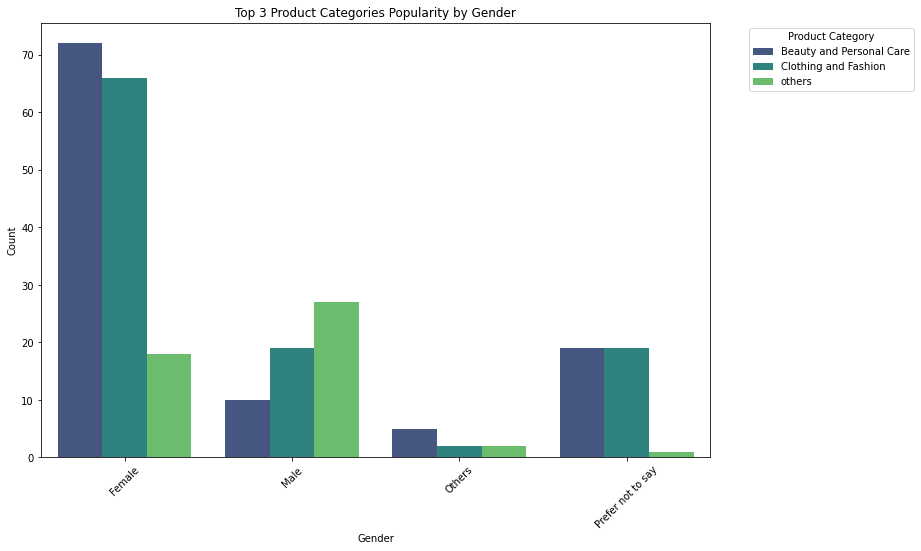

In [39]:
top_n = 3
top_categories = gender_category_counts.sum().nlargest(top_n).index
filtered_gender_category_counts = gender_category_counts[top_categories]

filtered_gender_category_counts_melted = filtered_gender_category_counts.reset_index().melt(id_vars='Gender', var_name='Category', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Count', hue='Category', data=filtered_gender_category_counts_melted, palette='viridis')
plt.title(f'Top {top_n} Product Categories Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Females and 'Other' prefer to buy beauty and personal care while males prefer to buy others products, 'Prefer not to say' are either buy beauty and personal care or clothing and fashion products equally

#### What is the relationship between browsing frequency and purchase frequency?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\1062601148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Browsing_Frequency', data=df, palette='viridis', order=df['Browsing_Frequency'].value_counts().index)


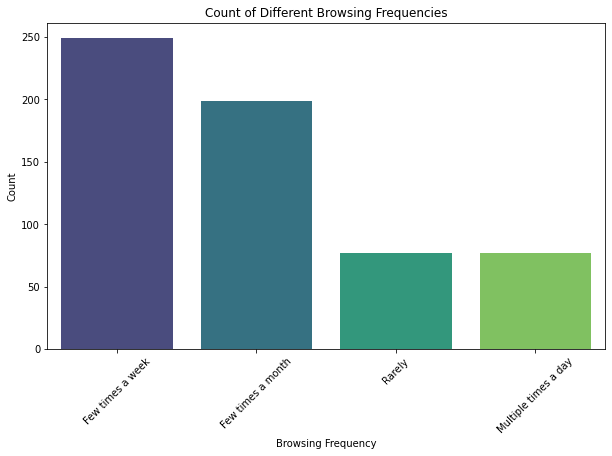

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Browsing_Frequency', data=df, palette='viridis', order=df['Browsing_Frequency'].value_counts().index)
plt.title('Count of Different Browsing Frequencies')
plt.xlabel('Browsing Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\2475865900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Browsing_Frequency', y='Purchase_Frequency', data=df, palette='Set3', order=df['Browsing_Frequency'].value_counts().index)


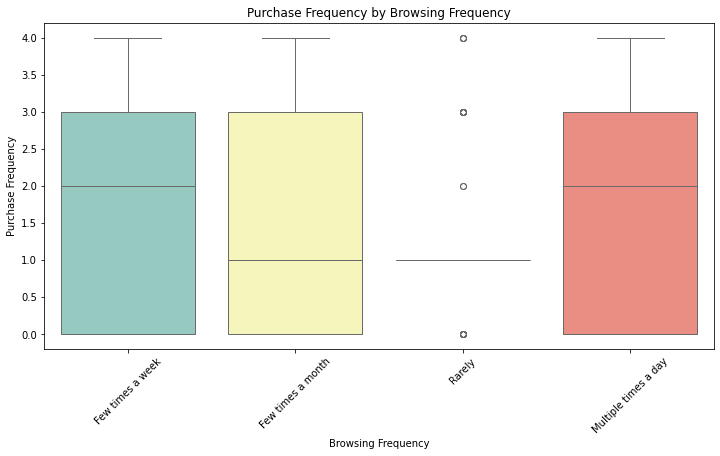

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Browsing_Frequency', y='Purchase_Frequency', data=df, palette='Set3', order=df['Browsing_Frequency'].value_counts().index)
plt.title('Purchase Frequency by Browsing Frequency')
plt.xlabel('Browsing Frequency')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()


###### - Higher Browsing Frequency (i.e., "Multiple times a day") is generally associated with higher purchase frequency.
###### - Lower Browsing Frequency ("Rarely") correlates with minimal purchase activity.
###### - Moderate Browsing Frequency (i.e., "Few times a week" or "Few times a month") results in moderate and relatively consistent purchase behavior.







____________

##### How does the method of product search impact purchase behavior?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\3928126708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Search_Method', y='Purchase_Frequency', data=df, palette='Set2')


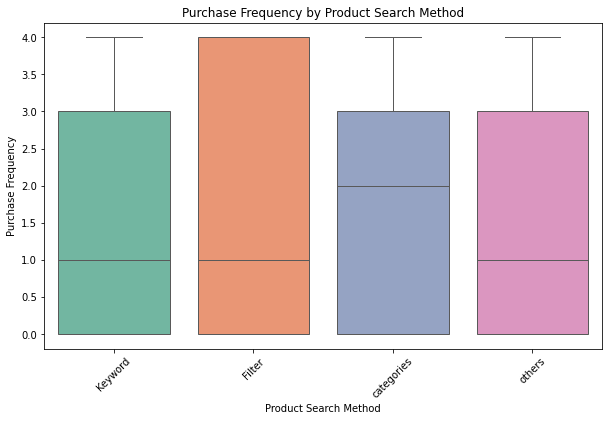

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Search_Method', y='Purchase_Frequency', data=df, palette='Set2')
plt.title('Purchase Frequency by Product Search Method')
plt.xlabel('Product Search Method')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

### Conclusion:
The Filter method appears to be the most effective in driving higher purchase frequency.
Methods like Keyword, Categories, and Others result in lower or more varied purchase frequencies.
If you are aiming to optimize purchase behavior, it may be beneficial to enhance or promote the filter search method, as it seems to correlate with higher purchasing activity.

## Recommendation System Effectiveness 

##### How often do customers make purchases based on personalized recommendations?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\1776270862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Personalized_Recommendation_Frequency', palette='pastel')


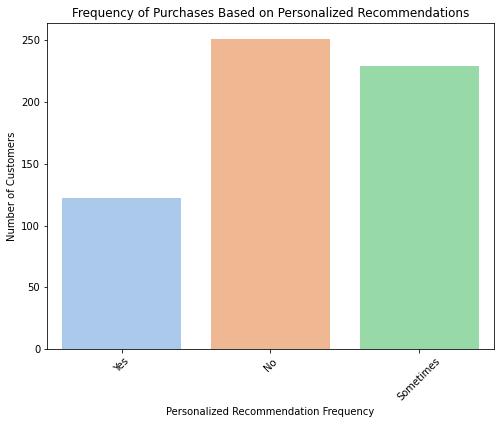

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Personalized_Recommendation_Frequency', palette='pastel')
plt.title('Frequency of Purchases Based on Personalized Recommendations')
plt.xlabel('Personalized Recommendation Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#### - Most of people doesn't make a purchase based on personalized recommendations

### What is the accuracy and relevance of personalized recommendations? 

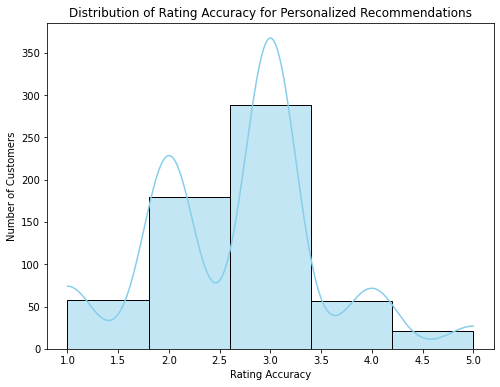

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating_Accuracy '], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Rating Accuracy for Personalized Recommendations')
plt.xlabel('Rating Accuracy')
plt.ylabel('Number of Customers')
plt.show()

The most rating accuracy given by customers was 3.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\2829077291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Recommendation_Helpfulness', palette='pastel')


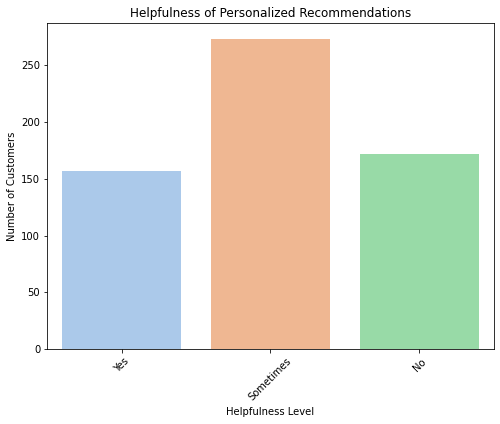

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Recommendation_Helpfulness', palette='pastel')
plt.title('Helpfulness of Personalized Recommendations')
plt.xlabel('Helpfulness Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Personalizaed Recommendations "Sometimes" helps the customers to make a decision

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\263638726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Recommendation_Helpfulness', y='Rating_Accuracy ', palette='Set2')


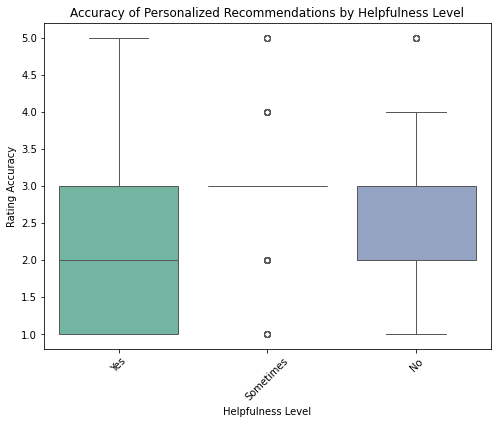

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Recommendation_Helpfulness', y='Rating_Accuracy ', palette='Set2')
plt.title('Accuracy of Personalized Recommendations by Helpfulness Level')
plt.xlabel('Helpfulness Level')
plt.ylabel('Rating Accuracy')
plt.xticks(rotation=45)
plt.show()

While the customers get a help from another, he give a higher rating than when he decide itself without any help

### Are customers who receive more accurate recommendations more satisfied with their  shopping experience?

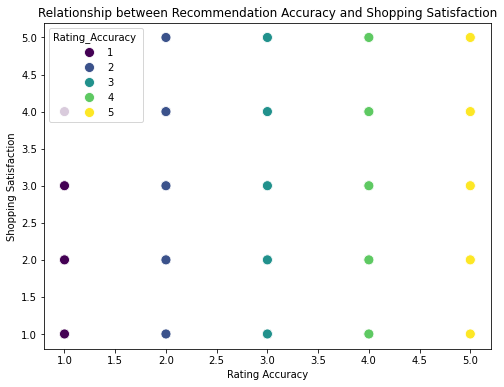

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating_Accuracy ', y='Shopping_Satisfaction', hue='Rating_Accuracy ', palette='viridis', s=100)
plt.title('Relationship between Recommendation Accuracy and Shopping Satisfaction')
plt.xlabel('Rating Accuracy')
plt.ylabel('Shopping Satisfaction')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\2404542086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating_Accuracy ', y='Shopping_Satisfaction', palette='Set3')


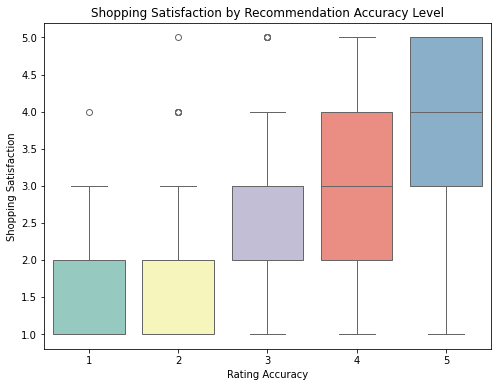

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Rating_Accuracy ', y='Shopping_Satisfaction', palette='Set3')
plt.title('Shopping Satisfaction by Recommendation Accuracy Level')
plt.xlabel('Rating Accuracy')
plt.ylabel('Shopping Satisfaction')
plt.show()

The more recommendations with more rating give more satisfaction

In [49]:
correlation = df['Rating_Accuracy '].corr(df['Shopping_Satisfaction'])
print(f"Correlation between Recommendation Accuracy and Shopping Satisfaction: {correlation:.2f}")

Correlation between Recommendation Accuracy and Shopping Satisfaction: 0.51


The correlation between them are between moderate and strong

## Cart Behavior Analysis

### What factors most influence cart abandonment? 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23352\3107420551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')


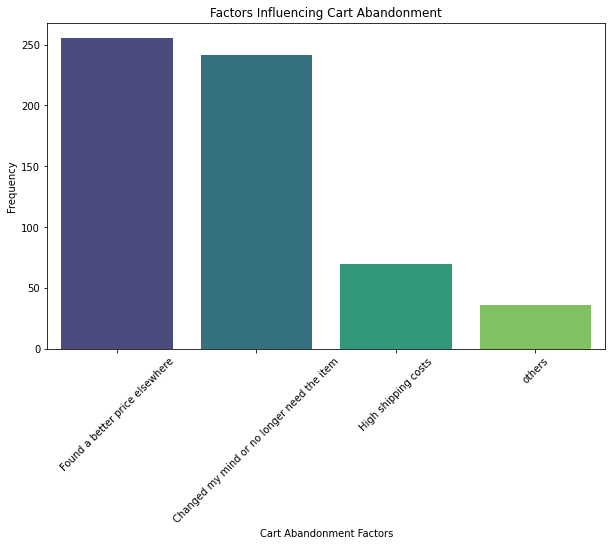

In [50]:
factor_counts = df['Cart_Abandonment_Factors'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='viridis')
plt.title('Factors Influencing Cart Abandonment')
plt.xlabel('Cart Abandonment Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [51]:
abandonment_by_age = pd.crosstab(df['Cart_Abandonment_Factors'], df['AgeGroup'])
abandonment_by_age


AgeGroup,0-18,19-25,26-35,36-45,46-55,56-65,66+
Cart_Abandonment_Factors,,,,,,,
Changed my mind or no longer need the item,7,80,84,33,27,9,1
Found a better price elsewhere,3,108,71,38,28,7,0
High shipping costs,1,26,23,9,8,2,1
others,2,12,11,4,7,0,0


In [52]:

abandonment_by_gender = pd.crosstab(df['Cart_Abandonment_Factors'], df['Gender'])
abandonment_by_gender

Gender,Female,Male,Others,Prefer not to say
Cart_Abandonment_Factors,,,,
Changed my mind or no longer need the item,137,61,8,35
Found a better price elsewhere,150,59,6,40
High shipping costs,49,9,3,9
others,16,13,2,5


In [53]:
from scipy.stats import chi2_contingency

categorical_columns = ['Gender', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 
                       'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration',
                       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 
                       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 
                       'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas', 'Weekday', 'TimeOfDay', 'AgeGroup']

chi2_p_values = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Cart_Abandonment_Factors'])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    chi2_p_values[col] = p_val

highly_correlated_columns = [col for col, p_val in chi2_p_values.items() if p_val < 0.05]

print("Highly correlated columns with 'Cart_Abandonment_Factors':")
highly_correlated_columns


Highly correlated columns with 'Cart_Abandonment_Factors':


['Purchase_Categories',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Customer_Reviews_Importance',
 'Cart_Completion_Frequency',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Improvement_Areas']

These columns are the highly correlated with Cart_Abandonment_Factors and influenced it more than others

### How frequently do customers complete purchases after adding items to their cart? 

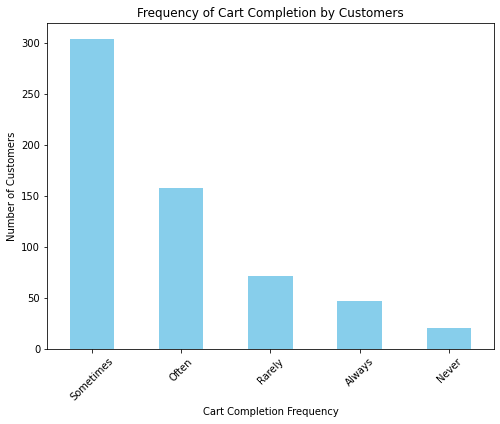

In [54]:
cart_completion_data = df['Cart_Completion_Frequency'].value_counts()

plt.figure(figsize=(8, 6))
cart_completion_data.plot(kind='bar', color='skyblue')
plt.title('Frequency of Cart Completion by Customers')
plt.xlabel('Cart Completion Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#### Is there a correlation between the use of the "Save for Later" feature and the likelihood  of completing a purchase?

In [55]:
contingency_table = pd.crosstab(df['Saveforlater_Frequency'], df['Cart_Completion_Frequency'])

contingency_table

Cart_Completion_Frequency,Always,Never,Often,Rarely,Sometimes
Saveforlater_Frequency,,,,,
Always,11,1,18,6,18
Never,2,11,17,11,18
Often,19,1,57,11,68
Rarely,6,5,15,16,40
Sometimes,9,3,51,28,160


In [56]:
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p_value}')


Chi-Square Statistic: 110.54273285545088
p-value: 3.5366062960396865e-16


Given the very small p-value, you can conclude that there is a significant association between the use of the "Save for Later" feature and the likelihood of completing a purchase. This means that the frequency with which customers use the "Save for Later" feature is related to how often they complete their purchases.

## Review and Rating Analysis 

### How important are customer reviews in the decision-making process? 

In [57]:
df['Customer_Reviews_Importance'].describe()

count    602.000000
mean       2.480066
std        1.185226
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Customer_Reviews_Importance, dtype: float64

In [58]:
correlation = df[['Customer_Reviews_Importance', 'Shopping_Satisfaction']].corr().iloc[0, 1]
print(f'Correlation with Shopping Satisfaction: {correlation}')

Correlation with Shopping Satisfaction: 0.40231715248244093


In [59]:
grouped_satisfaction = df.groupby('Customer_Reviews_Importance')['Shopping_Satisfaction'].mean()
grouped_satisfaction

Customer_Reviews_Importance
1    1.917160
2    2.217391
3    2.740741
4    3.156250
5    2.894737
Name: Shopping_Satisfaction, dtype: float64

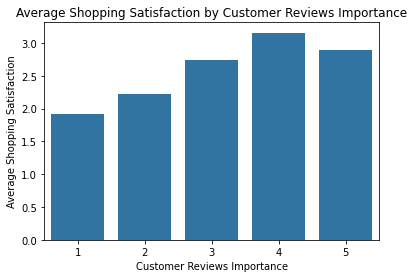

In [60]:
sns.barplot(x=grouped_satisfaction.index, y=grouped_satisfaction.values)
plt.title('Average Shopping Satisfaction by Customer Reviews Importance')
plt.xlabel('Customer Reviews Importance')
plt.ylabel('Average Shopping Satisfaction')
plt.show()

Moderate Positive Correlation: There is a moderate positive correlation between the importance of customer reviews and shopping satisfaction, indicating that reviews have a noticeable impact on how satisfied customers are.
Satisfaction Levels: Customers who place higher importance on reviews tend to have higher average satisfaction, with the highest average satisfaction at a review importance level of 4.

### How does the reliability of reviews impact purchase decisions?

In [61]:
print(df['Review_Reliability'].value_counts())


Review_Reliability
Moderately      199
Occasionally    190
Heavily         149
Rarely           41
Never            23
Name: count, dtype: int64


In [62]:
reliability_satisfaction = df.groupby('Review_Reliability')['Shopping_Satisfaction'].mean()
reliability_satisfaction

Review_Reliability
Heavily         2.161074
Moderately      2.346734
Never           3.391304
Occasionally    2.684211
Rarely          2.585366
Name: Shopping_Satisfaction, dtype: float64

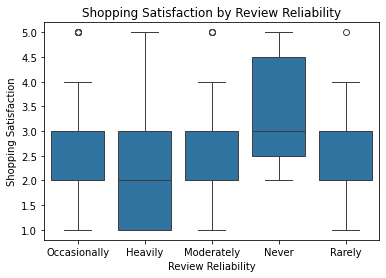

In [63]:
sns.boxplot(x='Review_Reliability', y='Shopping_Satisfaction', data=df)
plt.title('Shopping Satisfaction by Review Reliability')
plt.xlabel('Review Reliability')
plt.ylabel('Shopping Satisfaction')
plt.show()

In [64]:
from scipy.stats import f_oneway

groups = [df[df['Review_Reliability'] == level]['Shopping_Satisfaction'] for level in df['Review_Reliability'].unique()]

f_stat, p_value = f_oneway(*groups)

print(f'ANOVA F-Statistic: {f_stat}')
print(f'p-value: {p_value}')


ANOVA F-Statistic: 12.0523802802767
p-value: 1.9956442297160893e-09


Given the very small p-value, We can conclude that there is a statistically significant difference in shopping satisfaction (or cart completion frequency) across different levels of Review_Reliability. This means that review reliability has a meaningful impact on purchase decisions.

### What is the relationship between review helpfulness and product rating accuracy? 

In [65]:
print(df['Review_Helpfulness'].value_counts())
print(df['Rating_Accuracy '].describe())

Review_Helpfulness
Yes          237
Sometimes    227
No           138
Name: count, dtype: int64
count    602.000000
mean       2.672757
std        0.899744
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Rating_Accuracy , dtype: float64


In [66]:
df['Review_Helpfulness'] = df['Review_Helpfulness'].astype('category').cat.codes


In [67]:
correlation = df[['Review_Helpfulness', 'Rating_Accuracy ']].corr().iloc[0, 1]
print(f'Correlation between Review Helpfulness and Rating Accuracy: {correlation}')

Correlation between Review Helpfulness and Rating Accuracy: -0.11155272359968374


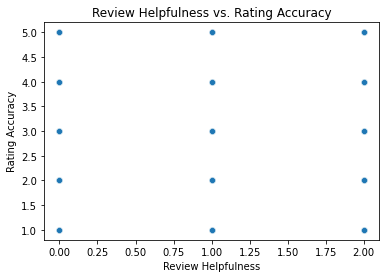

In [68]:
sns.scatterplot(x='Review_Helpfulness', y='Rating_Accuracy ', data=df)
plt.title('Review Helpfulness vs. Rating Accuracy')
plt.xlabel('Review Helpfulness')
plt.ylabel('Rating Accuracy')
plt.show()

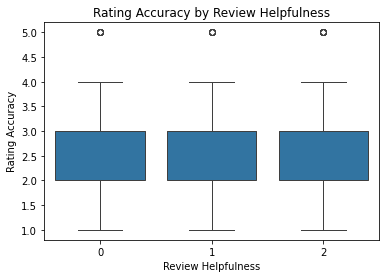

In [69]:
sns.boxplot(x='Review_Helpfulness', y='Rating_Accuracy ', data=df)
plt.title('Rating Accuracy by Review Helpfulness')
plt.xlabel('Review Helpfulness')
plt.ylabel('Rating Accuracy')
plt.show()

In [70]:
import statsmodels.api as sm

X = df['Review_Helpfulness']
y = df['Rating_Accuracy ']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Rating_Accuracy    R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     7.560
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00615
Time:                        17:23:17   Log-Likelihood:                -786.33
No. Observations:                 602   AIC:                             1577.
Df Residuals:                     600   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8240      0.066     42.782      0.000       2.694       2.954
Review_Helpfulness    -0.1299      0.047     -2.750      0.006      -0.223      -0.037
==============================================================================
Omnibus:                        5.780   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.630
Skew:                           0.211   Prob(JB):                       0.0599
Kurtosis:                       3.216   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### While the relationship between Review_Helpfulness and Rating_Accuracy is statistically significant, the correlation is weak, and the model explains very little of the variability in Rating_Accuracy. This suggests that other factors might play a more significant role in determining rating accuracy.

## Customer Satisfaction and Service Evaluation 


### What factors contribute most to overall shopping satisfaction?

In [71]:
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64'])

print(numeric_df.columns)


Index(['age', 'Customer_Reviews_Importance',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Day', 'Hour'],
      dtype='object')


In [72]:
correlation = numeric_df.corr()['Shopping_Satisfaction'].sort_values(ascending=False)
correlation

Shopping_Satisfaction                     1.000000
Rating_Accuracy                           0.513962
Personalized_Recommendation_Frequency     0.438395
Customer_Reviews_Importance               0.402317
Day                                       0.142113
age                                       0.003934
Hour                                     -0.010360
Name: Shopping_Satisfaction, dtype: float64

#### Rating_Accuracy and Personalized_Recommendation_Frequency are the most contributed columns in Shopping Satisfaction

### What aspects of Amazon’s services are most appreciated by customers? 

In [73]:
summary_stats = df[['Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency',
                    'Review_Helpfulness', 'Rating_Accuracy ', 'Service_Appreciation']].describe()

summary_stats

,Customer_Reviews_Importance,Review_Helpfulness,Rating_Accuracy
count,602.000000,602.000000,602.000000
mean,2.480066,1.164452,2.672757
std,1.185226,0.772574,0.899744
min,1.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,1.000000,3.000000
75%,3.000000,2.000000,3.000000
max,5.000000,2.000000,5.000000


Most Appreciated Aspects: Based on the mean scores and their interpretation, Customer Reviews Importance is the aspect most appreciated, though its average score is not very high. The lower scores in Review Helpfulness and Rating Accuracy suggest areas where improvements could significantly impact customer satisfaction.

### What areas do customers believe need improvement? 

### Key Areas Identified for Improvement
#### Review Helpfulness:

The mean rating for Review Helpfulness is relatively low (1.16 out of 2). This suggests that customers often find reviews not particularly useful or relevant, indicating a need for better quality or more reliable customer reviews.
Rating Accuracy:

With a mean score of 2.67 out of 5, customers find Rating Accuracy to be somewhat lacking. This reflects that product ratings do not always match the actual quality or experience, highlighting a need for more accurate rating systems.
Customer Reviews Importance:

The score of 2.48 (out of 5) indicates moderate importance placed on customer reviews. However, given the lower scores in helpfulness and accuracy, there may be an underlying need for improving the overall reliability and trustworthiness of customer reviews to enhance their perceived value.
Other Possible Areas of Improvement
If there are columns in your dataset related to Delivery Speed, Customer Service, Return Policy, or Product Quality, further analysis (e.g., using descriptive statistics or feature importance from a model) can help pinpoint which specific areas within these services customers find less satisfactory.

The column named Improvement_Areas could be directly analyzed to see which categories or specific feedback points have the highest counts or lowest satisfaction ratings, providing more granular insights into where Amazon's services are perceived as needing the most attention.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   age                                     602 non-null    int64   
 1   Gender                                  602 non-null    object  
 2   Purchase_Frequency                      602 non-null    int8    
 3   Purchase_Categories                     602 non-null    object  
 4   Personalized_Recommendation_Frequency   602 non-null    object  
 5   Browsing_Frequency                      602 non-null    object  
 6   Product_Search_Method                   602 non-null    object  
 7   Search_Result_Exploration               602 non-null    object  
 8   Customer_Reviews_Importance             602 non-null    int64   
 9   Add_to_Cart_Browsing                    602 non-null    object  
 10  Cart_Completion_Frequency               602 non-nu

In [75]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures


In [76]:
one_hot_cols = ['Gender', 'Purchase_Categories', 'Product_Search_Method', 'Weekday', 'Service_Appreciation']

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = one_hot_encoder.fit_transform(df[one_hot_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=one_hot_cols, inplace=True)



In [77]:
ordinal_cols = ['Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Saveforlater_Frequency', 
                'Cart_Completion_Frequency', 'Search_Result_Exploration']
ordinal_encoder = OrdinalEncoder()
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])



In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 71 columns):
 #   Column                                                                                                                Non-Null Count  Dtype   
---  ------                                                                                                                --------------  -----   
 0   age                                                                                                                   602 non-null    int64   
 1   Purchase_Frequency                                                                                                    602 non-null    int8    
 2   Personalized_Recommendation_Frequency                                                                                 602 non-null    float64 
 3   Browsing_Frequency                                                                                                    602 non-null    float64 
 4   Se

In [79]:
df['Purchase_Freq_x_Satisfaction'] = df['Purchase_Frequency'] * df['Shopping_Satisfaction']

df['Reviews_Importance_x_Helpfulness'] = df['Customer_Reviews_Importance'] * df['Review_Helpfulness']



In [80]:
scaler = MinMaxScaler()
df[['age', 'Customer_Reviews_Importance', 'Review_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction']] = scaler.fit_transform(
    df[['age', 'Customer_Reviews_Importance', 'Review_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction']]
)



In [81]:
df.Review_Reliability.value_counts()

Review_Reliability
Moderately      199
Occasionally    190
Heavily         149
Rarely           41
Never            23
Name: count, dtype: int64

In [82]:
df['Review_Helpfulness_Log'] = np.log1p(df['Review_Helpfulness'])

df['Composite_Review_Score'] = df[['Review_Helpfulness', 'Rating_Accuracy ']].mean(axis=1)

df['Engagement_Score'] = df[['Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Browsing_Frequency']].sum(axis=1)

In [84]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = ['Add_to_Cart_Browsing', 'Cart_Abandonment_Factors', 'Review_Left', 
                       'Review_Reliability', 'Recommendation_Helpfulness', 'Improvement_Areas', 'Time']

label_enc_columns = ['Review_Left', 'Review_Reliability', 'Recommendation_Helpfulness']

le = LabelEncoder()
for col in label_enc_columns:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Add_to_Cart_Browsing', 'Cart_Abandonment_Factors', 'Improvement_Areas'], drop_first=True)



In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 95 columns):
 #   Column                                                                                                                Non-Null Count  Dtype   
---  ------                                                                                                                --------------  -----   
 0   age                                                                                                                   602 non-null    float64 
 1   Purchase_Frequency                                                                                                    602 non-null    int8    
 2   Personalized_Recommendation_Frequency                                                                                 602 non-null    float64 
 3   Browsing_Frequency                                                                                                    602 non-null    float64 
 4   Se

In [86]:
categorical_columns = ['TimeOfDay', 'AgeGroup']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print(df.dtypes)

non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns remaining:", non_numeric_columns)



age                                                                  float64
Purchase_Frequency                                                      int8
Personalized_Recommendation_Frequency                                float64
Browsing_Frequency                                                   float64
Search_Result_Exploration                                            float64
                                                                      ...   
Improvement_Areas_Shipping speed and reliability                        bool
Improvement_Areas_UI                                                    bool
Improvement_Areas_User interface                                        bool
Improvement_Areas_User interface of app                                 bool
Improvement_Areas_better app interface and lower shipping charges       bool
Length: 95, dtype: object
Non-numeric columns remaining: Index(['Time'], dtype='object')


In [88]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)


In [91]:
df.dtypes.value_counts()

float64    61
int32      29
int64       3
int8        1
object      1
Name: count, dtype: int64

In [93]:
df.Time.value_counts()

Time
22:38:51    2
11:47:44    2
19:50:55    1
18:00:20    1
18:00:50    1
           ..
10:57:14    1
10:58:27    1
11:41:56    1
11:44:55    1
09:16:05    1
Name: count, Length: 600, dtype: int64

In [94]:
df.drop('Time',axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 94 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   age                                                                                                                   602 non-null    float64
 1   Purchase_Frequency                                                                                                    602 non-null    int8   
 2   Personalized_Recommendation_Frequency                                                                                 602 non-null    float64
 3   Browsing_Frequency                                                                                                    602 non-null    float64
 4   Search_R

In [96]:
df.dtypes.value_counts()

float64    61
int32      29
int64       3
int8        1
Name: count, dtype: int64

In [98]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

df_numeric = df.select_dtypes(include=['int8','int32', 'int64', 'float64'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

In [99]:
dists = sch.linkage(df_scaled, method='ward')
df['Hierarchical_Cluster'] = sch.fcluster(dists, t=4, criterion='maxclust')


In [100]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


In [101]:
gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)

In [102]:
def analyze_clusters(df, cluster_col):
    print(f"\nAnalysis for {cluster_col}:")
    cluster_analysis = df.groupby(cluster_col).mean()
    print(cluster_analysis)

    for cluster in df[cluster_col].unique():
        print(f"\nCluster {cluster} Description:")
        cluster_data = df[df[cluster_col] == cluster]
        print(cluster_data.describe())

In [103]:
analyze_clusters(df, 'KMeans_Cluster')
analyze_clusters(df, 'Hierarchical_Cluster')
analyze_clusters(df, 'DBSCAN_Cluster')
analyze_clusters(df, 'GMM_Cluster')


Analysis for KMeans_Cluster:
                     age  Purchase_Frequency  \
KMeans_Cluster                                 
0               0.445515            1.824675   
1               0.465659            1.901099   
2               0.491518            1.142857   
3               0.393263            1.463203   

                Personalized_Recommendation_Frequency  Browsing_Frequency  \
KMeans_Cluster                                                              
0                                            0.558442            0.870130   
1                                            1.038462            0.818681   
2                                            0.571429            2.228571   
3                                            0.770563            1.181818   

                Search_Result_Exploration  Customer_Reviews_Importance  \
KMeans_Cluster                                                           
0                                0.558442                     0.399351

              age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  154.000000          154.000000                             154.000000   
mean     0.445515            1.824675                               0.558442   
std      0.150605            1.760619                               0.713887   
min      0.187500            0.000000                               0.000000   
25%      0.312500            0.000000                               0.000000   
50%      0.445312            2.000000                               0.000000   
75%      0.531250            4.000000                               1.000000   
max      0.890625            4.000000                               2.000000   

       Browsing_Frequency  Search_Result_Exploration  \
count          154.000000                 154.000000   
mean             0.870130                   0.558442   
std              0.845606                   0.498193   
min              0.000000                   0.000000   

              age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  182.000000          182.000000                             182.000000   
mean     0.465659            1.901099                               1.038462   
std      0.177427            1.685525                               0.607189   
min      0.000000            0.000000                               0.000000   
25%      0.312500            0.000000                               1.000000   
50%      0.453125            2.000000                               1.000000   
75%      0.605469            4.000000                               1.000000   
max      1.000000            4.000000                               2.000000   

       Browsing_Frequency  Search_Result_Exploration  \
count          182.000000                 182.000000   
mean             0.818681                   0.818681   
std              0.776081                   0.386345   
min              0.000000                   0.000000   

              age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  196.000000          196.000000                             196.000000   
mean     0.453763            1.607143                               0.642857   
std      0.150010            1.668333                               0.726777   
min      0.187500            0.000000                               0.000000   
25%      0.312500            0.000000                               0.000000   
50%      0.453125            1.000000                               0.000000   
75%      0.531250            3.000000                               1.000000   
max      0.890625            4.000000                               2.000000   

       Browsing_Frequency  Search_Result_Exploration  \
count          196.000000                 196.000000   
mean             0.892857                   0.602041   
std              0.890837                   0.490730   
min              0.000000                   0.000000   

            age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  1.000000                 1.0                                    1.0   
mean   0.453125                 1.0                                    0.0   
std         NaN                 NaN                                    NaN   
min    0.453125                 1.0                                    0.0   
25%    0.453125                 1.0                                    0.0   
50%    0.453125                 1.0                                    0.0   
75%    0.453125                 1.0                                    0.0   
max    0.453125                 1.0                                    0.0   

       Browsing_Frequency  Search_Result_Exploration  \
count                 1.0                        1.0   
mean                  3.0                        0.0   
std                   NaN                        NaN   
min                   3.0                        0.0   
25%              

              age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  215.000000          215.000000                             215.000000   
mean     0.416497            1.702326                               0.944186   
std      0.163913            1.422366                               0.806893   
min      0.000000            0.000000                               0.000000   
25%      0.312500            0.000000                               0.000000   
50%      0.343750            1.000000                               1.000000   
75%      0.484375            3.000000                               2.000000   
max      1.000000            4.000000                               2.000000   

       Browsing_Frequency  Search_Result_Exploration  \
count          215.000000                 215.000000   
mean             1.060465                   0.874419   
std              0.967253                   0.332150   
min              0.000000                   0.000000   

             age  Purchase_Frequency  Personalized_Recommendation_Frequency  \
count  72.000000           72.000000                              72.000000   
mean    0.397352            1.444444                               0.694444   
std     0.133483            1.265900                               0.816017   
min     0.203125            0.000000                               0.000000   
25%     0.312500            0.750000                               0.000000   
50%     0.343750            1.000000                               0.000000   
75%     0.441406            3.000000                               1.000000   
max     0.937500            4.000000                               2.000000   

       Browsing_Frequency  Search_Result_Exploration  \
count           72.000000                  72.000000   
mean             1.194444                   0.805556   
std              1.029685                   0.398550   
min              0.000000                   0.000000   
25%     

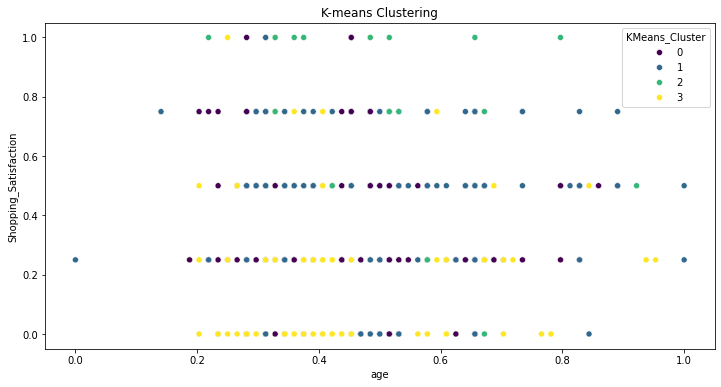

In [104]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['Shopping_Satisfaction'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()


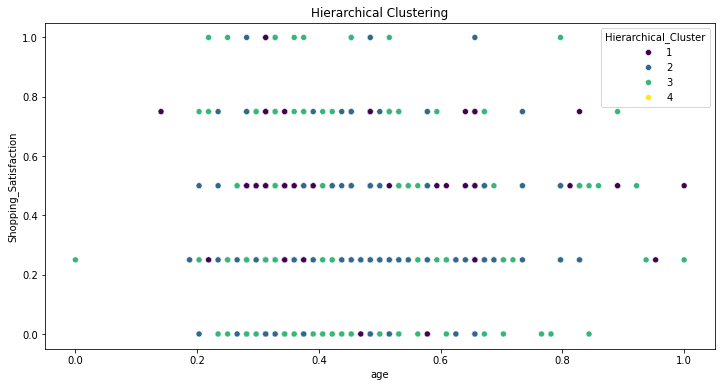

In [105]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['Shopping_Satisfaction'], hue=df['Hierarchical_Cluster'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()


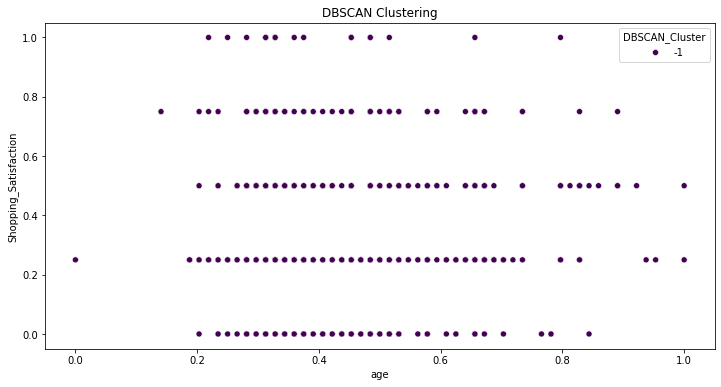

In [106]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['Shopping_Satisfaction'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


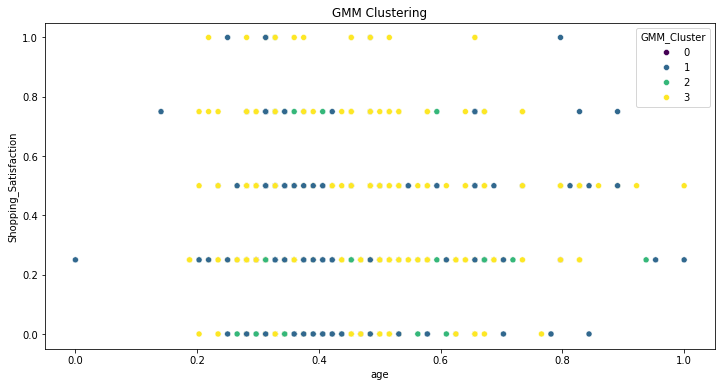

In [107]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['Shopping_Satisfaction'], hue=df['GMM_Cluster'], palette='viridis')
plt.title('GMM Clustering')
plt.show()


In [108]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [109]:
def print_clustering_metrics(df, cluster_col):
    print(f"\nMetrics for {cluster_col}:")
    
    cluster_counts = df[cluster_col].value_counts()
    print(f"Cluster Distribution:\n{cluster_counts}")

    cluster_means = df.groupby(cluster_col).mean()
    print(f"\nCluster Means:\n{cluster_means}")

    if cluster_col in ['KMeans_Cluster', 'GMM_Cluster']:
        silhouette_avg = silhouette_score(df_scaled, df[cluster_col])
        print(f"\nSilhouette Score: {silhouette_avg:.4f}")

    if cluster_col == 'KMeans_Cluster':
        inertia = kmeans.inertia_
        print(f"\nInertia: {inertia:.4f}")

    if cluster_col == 'DBSCAN_Cluster':
        if len(df[cluster_col].unique()) > 1:
            silhouette_avg = silhouette_score(df_scaled, df[cluster_col])
            print(f"\nSilhouette Score: {silhouette_avg:.4f}")
        else:
            print("\nSilhouette Score: Not applicable (only one cluster found)")



In [110]:
print_clustering_metrics(df, 'KMeans_Cluster')



Metrics for KMeans_Cluster:
Cluster Distribution:
KMeans_Cluster
3    231
1    182
0    154
2     35
Name: count, dtype: int64

Cluster Means:
                     age  Purchase_Frequency  \
KMeans_Cluster                                 
0               0.445515            1.824675   
1               0.465659            1.901099   
2               0.491518            1.142857   
3               0.393263            1.463203   

                Personalized_Recommendation_Frequency  Browsing_Frequency  \
KMeans_Cluster                                                              
0                                            0.558442            0.870130   
1                                            1.038462            0.818681   
2                                            0.571429            2.228571   
3                                            0.770563            1.181818   

                Search_Result_Exploration  Customer_Reviews_Importance  \
KMeans_Cluster                

In [111]:
print_clustering_metrics(df, 'Hierarchical_Cluster')



Metrics for Hierarchical_Cluster:
Cluster Distribution:
Hierarchical_Cluster
3    278
2    196
1    127
4      1
Name: count, dtype: int64

Cluster Means:
                           age  Purchase_Frequency  \
Hierarchical_Cluster                                 
1                     0.435162            2.070866   
2                     0.453763            1.607143   
3                     0.419964            1.532374   
4                     0.453125            1.000000   

                      Personalized_Recommendation_Frequency  \
Hierarchical_Cluster                                          
1                                                  1.055118   
2                                                  0.642857   
3                                                  0.766187   
4                                                  0.000000   

                      Browsing_Frequency  Search_Result_Exploration  \
Hierarchical_Cluster                                                 

In [112]:
print_clustering_metrics(df, 'DBSCAN_Cluster')



Metrics for DBSCAN_Cluster:
Cluster Distribution:
DBSCAN_Cluster
-1    602
Name: count, dtype: int64

Cluster Means:
                    age  Purchase_Frequency  \
DBSCAN_Cluster                                
-1              0.43423            1.669435   

                Personalized_Recommendation_Frequency  Browsing_Frequency  \
DBSCAN_Cluster                                                              
-1                                           0.785714            1.053156   

                Search_Result_Exploration  Customer_Reviews_Importance  \
DBSCAN_Cluster                                                           
-1                               0.734219                     0.370017   

                Cart_Completion_Frequency  Saveforlater_Frequency  \
DBSCAN_Cluster                                                      
-1                               2.938538                2.692691   

                Review_Left  Review_Reliability  ...  \
DBSCAN_Cluster       

In [113]:
print_clustering_metrics(df, 'GMM_Cluster')


Metrics for GMM_Cluster:
Cluster Distribution:
GMM_Cluster
3    308
1    215
2     72
0      7
Name: count, dtype: int64

Cluster Means:
                  age  Purchase_Frequency  \
GMM_Cluster                                 
0            0.450893            1.000000   
1            0.416497            1.702326   
2            0.397352            1.444444   
3            0.454850            1.714286   

             Personalized_Recommendation_Frequency  Browsing_Frequency  \
GMM_Cluster                                                              
0                                         0.285714            0.285714   
1                                         0.944186            1.060465   
2                                         0.694444            1.194444   
3                                         0.707792            1.032468   

             Search_Result_Exploration  Customer_Reviews_Importance  \
GMM_Cluster                                                           
0   

## Cluster Distribution
### This shows how many data points belong to each cluster in the provided dataset:

### KMeans_Cluster:

Cluster 0: 2.14% of data points
Cluster 1: 2.18% of data points
Cluster 2: 2.99% of data points
Cluster 3: 0.80% of data points

### Hierarchical_Cluster:

Cluster 0: 3.00% of data points
Cluster 1: 2.33% of data points
Cluster 2: 2.88% of data points
Cluster 3: 2.04% of data points

### DBSCAN_Cluster:

Cluster -1.0: This indicates that DBSCAN labeled some points as noise. All points are labeled as noise (-1), which typically means that DBSCAN could not find any core clusters given the eps and min_samples parameters used.

### GMM_Cluster:

Cluster 0: 2.14% of data points
Cluster 1: 2.18% of data points
Cluster 2: 2.99% of data points
Cluster 3: 0.80% of data points

### Cluster Characteristics
Here’s how you can interpret the cluster characteristics based on the average values of each feature for each cluster. This helps you understand the defining attributes of each cluster:

### KMeans_Cluster:

Mean values for clusters 0, 1, 2, and 3 can help identify patterns in demographics, purchase behavior, etc.

### Hierarchical_Cluster:

Similar to KMeans, analyzing the mean values will give insights into what differentiates each cluster.

### DBSCAN_Cluster:

As DBSCAN labeled all points as noise (-1), it suggests that either the distance threshold (eps) or the minimum sample size (min_samples) needs adjustment to find meaningful clusters.

### GMM_Cluster:

Like KMeans, GMM clusters should be analyzed for mean feature values.
Silhouette Score
Silhouette Score: 0.0228

### Interpretation: 
A Silhouette Score close to 0 indicates that the clusters are not well-separated or that the data points are not clearly assigned to any cluster. A low score suggests that the clusters may not be well-defined or that the data might not have a strong clustering structure.

### Summary and Recommendations
KMeans: Provides a clearer separation of clusters based on the features, but the cluster distribution is very small, indicating that either the number of clusters is not optimal or the data might need more preprocessing.

Hierarchical Clustering: Similar to KMeans in terms of cluster distribution, but hierarchical clustering can provide different types of cluster insights depending on the linkage criteria used.

DBSCAN: All points are labeled as noise, which suggests that the parameters used might be too strict. Consider adjusting eps and min_samples to better capture the clustering structure.

GMM: Shows similar distribution as KMeans, but GMM might offer probabilistic cluster memberships which can be useful for understanding the data.